In [2]:
! mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./mlruns --host 127.0.0.1 --port 6005

^C


In [3]:
import mlflow

mlflow.set_tracking_uri("http://127.0.0.1:6005")

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Charger les données
data = pd.read_csv(r"C:\Users\marin\Downloads\Loan_Data.csv")

# Prétraitement des données
X = data[['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']]
y = data['default']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2024/09/21 10:22:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/21 10:22:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Modèle Régression Logistique at: http://127.0.0.1:6005/#/experiments/0/runs/1a7169fbbd6846d8ab50ae7171fc7529.
2024/09/21 10:22:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:6005/#/experiments/0.


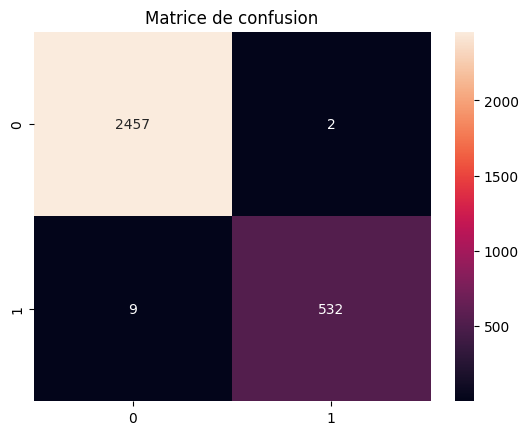

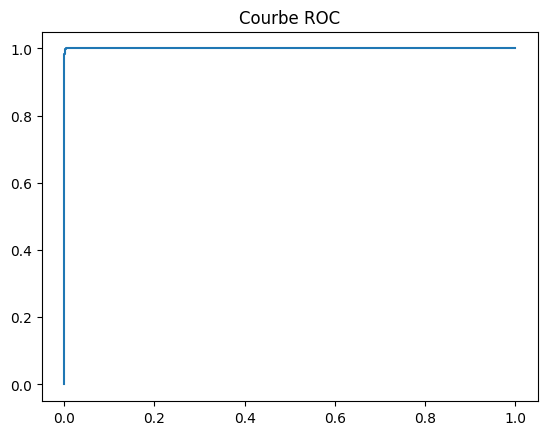

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Entraînement et log du modèle de régression logistique
with mlflow.start_run(run_name="Modèle Régression Logistique"):
    log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
    log_reg.fit(X_train_scaled, y_train)
    
    y_pred = log_reg.predict(X_test_scaled)
    y_probs = log_reg.predict_proba(X_test_scaled)[:, 1]
    
    # Évaluation des performances
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_probs)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    # Log des métriques dans MLflow
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_param("solver", "lbfgs")
    mlflow.log_param("max_iter", 1000)
    
    # Log du modèle
    mlflow.sklearn.log_model(log_reg, "logistic_regression_model")
    
    # Matrice de confusion
    plt.figure()
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    plt.title('Matrice de confusion')
    plt.savefig("confusion_matrix_logreg.png")
    mlflow.log_artifact("confusion_matrix_logreg.png")
    
    # Courbe ROC
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
    plt.title('Courbe ROC')
    plt.savefig("roc_curve_logreg.png")
    mlflow.log_artifact("roc_curve_logreg.png")

2024/09/21 10:22:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/21 10:22:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Modèle Random Forest at: http://127.0.0.1:6005/#/experiments/0/runs/51e9a2218acb4b91b5973bac53f305dc.
2024/09/21 10:22:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:6005/#/experiments/0.


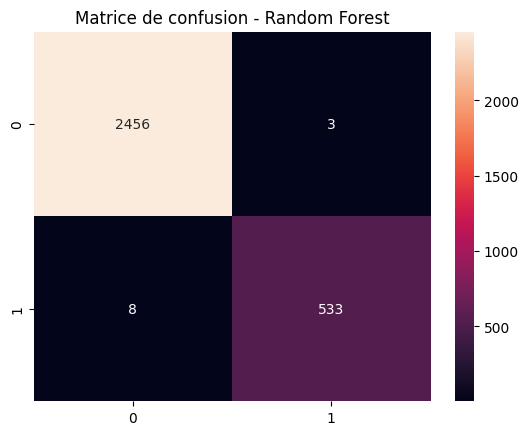

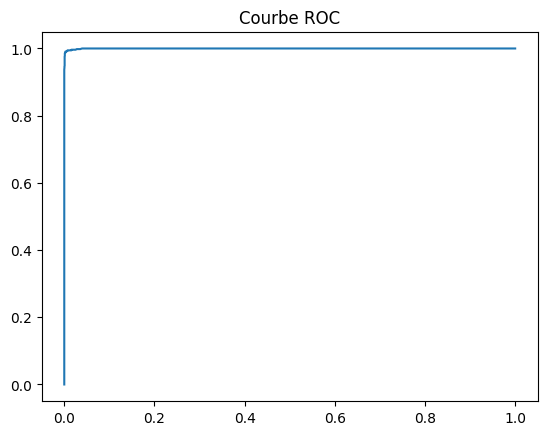

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement et log du modèle Random Forest
with mlflow.start_run(run_name="Modèle Random Forest"):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    
    y_pred_rf = rf.predict(X_test_scaled)
    y_probs_rf = rf.predict_proba(X_test_scaled)[:, 1]
    
    # Évaluation des performances
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    auc_rf = roc_auc_score(y_test, y_probs_rf)
    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    
    # Log des métriques dans MLflow
    mlflow.log_metric("accuracy", accuracy_rf)
    mlflow.log_metric("roc_auc", roc_auc_rf)
    mlflow.log_param("n_estimators", 100)
    
    # Log du modèle
    mlflow.sklearn.log_model(rf, "random_forest_model")
    
    # Matrice de confusion
    plt.figure()
    sns.heatmap(conf_matrix_rf, annot=True, fmt='d')
    plt.title('Matrice de confusion - Random Forest')
    plt.savefig("confusion_matrix_rf.png")
    mlflow.log_artifact("confusion_matrix_rf.png")
    
    # Courbe ROC
    plt.figure()
    plt.plot(fpr_rf, tpr_rf, label=f'ROC (AUC = {roc_auc_rf:.2f})')
    plt.title('Courbe ROC')
    plt.savefig("roc_curve_rf.png")
    mlflow.log_artifact("roc_curve_rf.png")
